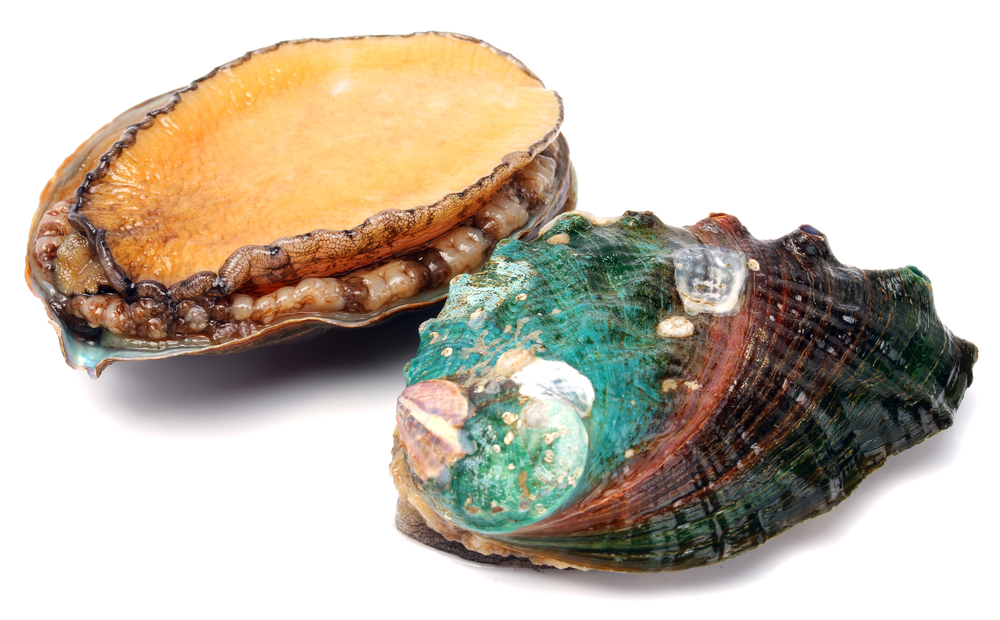

# Aim: Predicting the age of abalone
Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Number of Instances: 4177

Number of Attributes: 9


## Attribute information:
Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.

Name        Data Type   Meas.   Description
----        ---------   -----   -----------
Sex            nominal           M, F, and I (infant)
Length         continuous   mm   Longest shell measurement
Diameter       continuous   mm   perpendicular to length
Height         continuous   mm   with meat in shell
Whole weight    continuous  grams   whole abalone
Shucked weight  continuous  grams   weight of meat
Viscera weight  continuous  grams   gut weight (after bleeding)
Shell weight    continuous  grams   after being dried
Rings           integer             +1.5 gives the age in years

###### First of all We have need to import all required Libarary's.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

###### Now we have import our Abalone_dataset.

In [2]:
data=pd.read_csv(r"G:\Intershop_21\DataTrained Project\Project - 4 - Abalone\abalone.csv")

In [3]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
data.shape

(4177, 9)

In [5]:
data.head()     # Checking the first five rows of the data.

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
data.tail()     # Checking the last five rows of the data.

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [7]:
data.sample(5)     # Checking the random five rows of the data.

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
558,F,0.660,0.530,0.170,1.3260,0.5190,0.2625,0.4400,13
101,M,0.550,0.435,0.145,0.8430,0.3280,0.1915,0.2550,15
2700,M,0.670,0.510,0.180,1.6800,0.9260,0.2975,0.3935,13
1607,I,0.540,0.425,0.135,0.6860,0.3475,0.1545,0.2130,8
2757,I,0.525,0.375,0.120,0.6315,0.3045,0.1140,0.1900,9


In [8]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [9]:
data.info()     # Cheking the info of the all columns and aslo the overview.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [10]:
data.dtypes     # Checking the Datatypes os the columns.

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [11]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Here we can see count in each colum is 4177 which indicates all the columns having data, null values are not present.

For Height column minimun value is '0', which is not possible. This need to be treated later.

Outliers are present in the dataset, we will visualize this later.

In [12]:
data[data['Height']== 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [13]:
data.drop(index=[1257, 3996], inplace= True)

Our index 1257 and 3996 are having '0' Height, we will remove this data from our dataset.

In [14]:
# Now check the shape after removing two ROWs
data.shape

(4175, 9)

In [15]:
# Now check dublicate entries.
data.duplicated().sum()

0

In [16]:
data.isnull().sum()     # Checking null values are present in dataset or not.

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

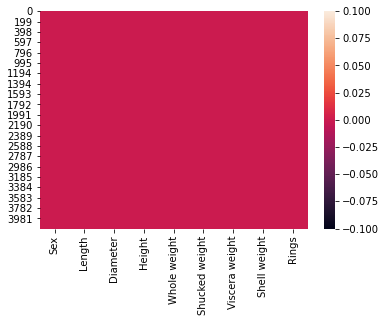

In [17]:
sns.heatmap(data.isnull())     # Checking null values are present in dataset or not with the help of Seaborn(heatmap).

In [18]:
# Now we will encode our oject type data(Sex)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])

In [19]:
data.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


Now our data is encoded. we can move ahead.

In [20]:
# Calculating the age of as per the given direction.
data['Age']= data['Rings']+1.5
data= data.drop('Rings',axis=1)

In [21]:
data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,1.000000,-0.036121,-0.038930,-0.042293,-0.021433,-0.001405,-0.032112,-0.034862,-0.034663
Length,-0.036121,1.000000,0.986802,0.828108,0.925217,0.897859,0.902960,0.898419,0.556464
Diameter,-0.038930,0.986802,1.000000,0.834298,0.925414,0.893108,0.899672,0.906084,0.574418
Height,-0.042293,0.828108,0.834298,1.000000,0.819886,0.775621,0.798908,0.819596,0.557625
Whole weight,-0.021433,0.925217,0.925414,0.819886,1.000000,0.969389,0.966354,0.955924,0.540151
Shucked weight,-0.001405,0.897859,0.893108,0.775621,0.969389,1.000000,0.931924,0.883129,0.420597
Viscera weight,-0.032112,0.902960,0.899672,0.798908,0.966354,0.931924,1.000000,0.908186,0.503562
Shell weight,-0.034862,0.898419,0.906084,0.819596,0.955924,0.883129,0.908186,1.000000,0.627928
Age,-0.034663,0.556464,0.574418,0.557625,0.540151,0.420597,0.503562,0.627928,1.000000


<AxesSubplot:>

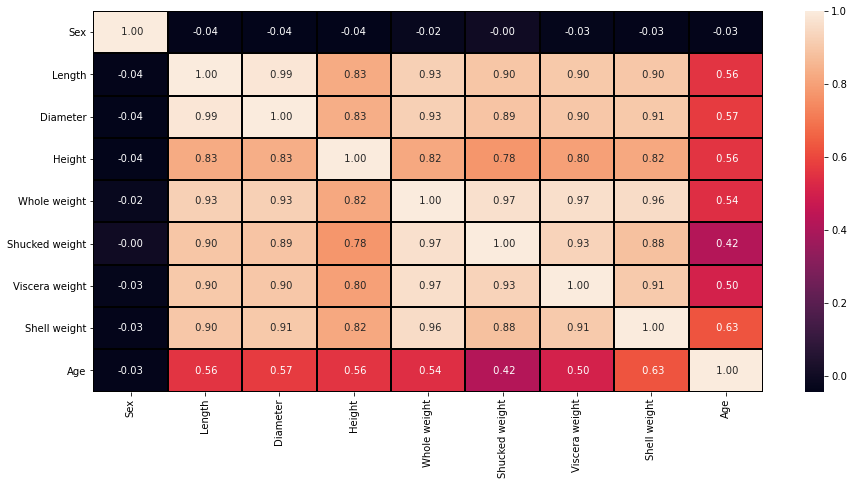

In [22]:
plt.figure(figsize=(15, 7))

sns.heatmap(data.corr(),annot= True,linewidths=1,linecolor='black',fmt=' .2f' )

We can see our data is highly corelated.

Length and Diameter are having 99 percent correlaction.

Whole weught is having 97 percent correction with Vicera and Shucked weight.

only Sex column having negative corelation.

We can say our data is having Multicolinearity problem.

## EDA / Visualization of Data

###### Here we will perform Univariate analysis

<AxesSubplot:xlabel='Sex', ylabel='Density'>

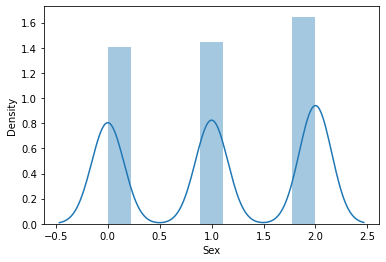

In [23]:
sns.distplot(data.Sex)

The Data is not normalised. The building blocks are out of normalised curve.

<AxesSubplot:xlabel='Length', ylabel='Density'>

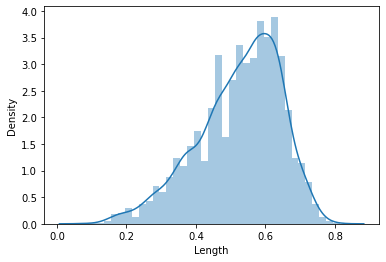

In [24]:
sns.distplot(data.Length)

The Data is not normalised. The building blocks are out of normalised curve.

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

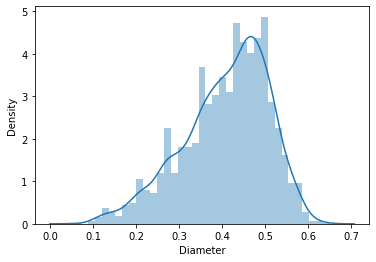

In [25]:
sns.distplot(data.Diameter)

The Data is not normalised. The building blocks are out of normalised curve.

<AxesSubplot:xlabel='Height', ylabel='Density'>

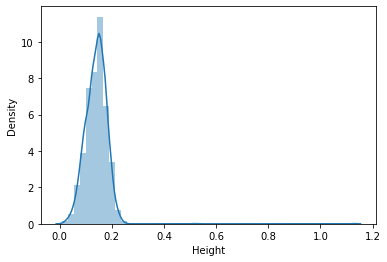

In [26]:
sns.distplot(data.Height)

The Data is not normalised. The building blocks are out of normalised curve.

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

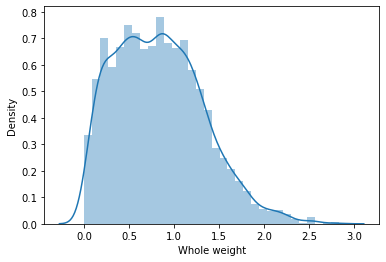

In [27]:
sns.distplot(data['Whole weight'])

The Data is not normalised. The building blocks are out of normalised curve.

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

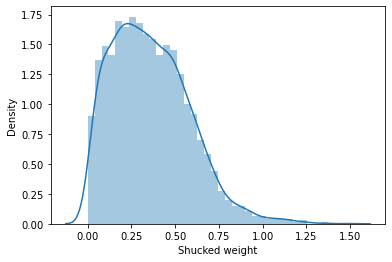

In [28]:
sns.distplot(data['Shucked weight'])

The Data is not normalised. The building blocks are out of normalised curve.

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

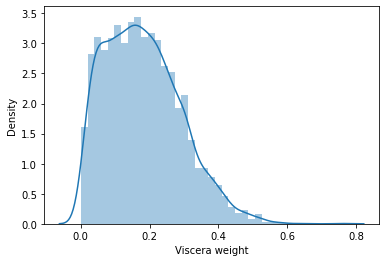

In [29]:
sns.distplot(data['Viscera weight'])

The Data is not normalised. The building blocks are out of normalised curve.

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

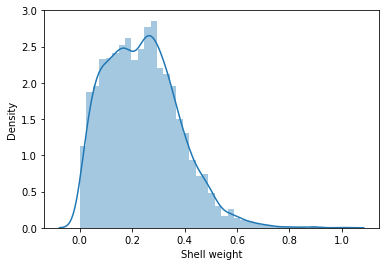

In [30]:
sns.distplot(data['Shell weight'])

The Data is not normalised. The building blocks are out of normalised curve.

<AxesSubplot:xlabel='Age', ylabel='Density'>

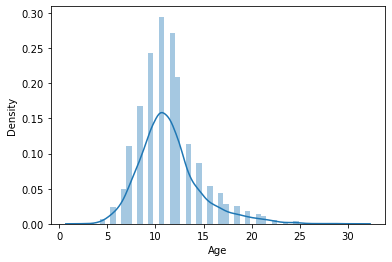

In [31]:
sns.distplot(data.Age)

The Data is not normalised. The building blocks are out of normalised curve.

###### Here we will perform Bivariate analysis

<AxesSubplot:xlabel='Age', ylabel='Sex'>

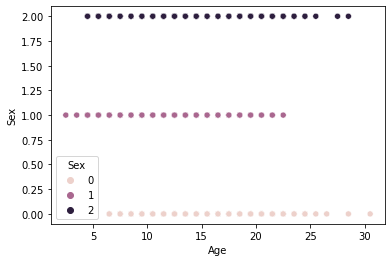

In [32]:
sns.scatterplot(data= data, x='Age', y='Sex', hue='Sex')

<AxesSubplot:xlabel='Age', ylabel='Length'>

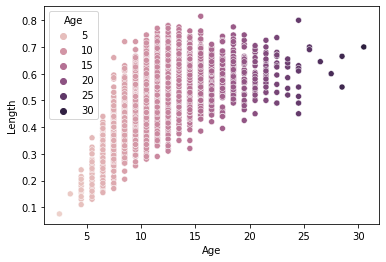

In [33]:
sns.scatterplot(data=data, x="Age", y="Length", hue="Age")

<AxesSubplot:xlabel='Age', ylabel='Diameter'>

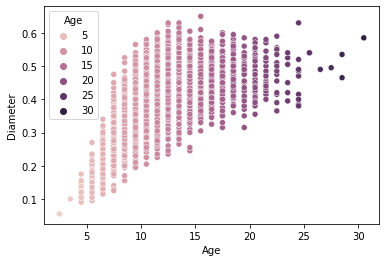

In [34]:
sns.scatterplot(data=data, x="Age", y="Diameter", hue="Age")

Here we can see Length and Diameter Having almost similaer kind of pattern, it idiactes lenngth and Dia meater having linear relationship.

<AxesSubplot:xlabel='Age', ylabel='Height'>

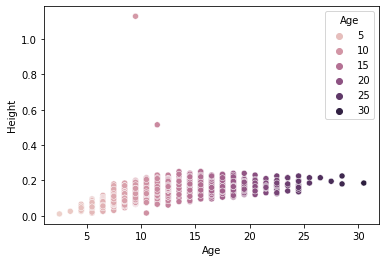

In [35]:
sns.scatterplot(data=data, x="Age", y="Height", hue="Age")

Here we can see all the age groups are having height 0.010000 to 1.130000 mm.

<AxesSubplot:xlabel='Age', ylabel='Whole weight'>

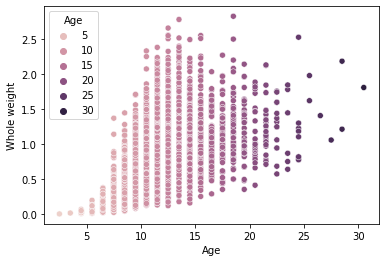

In [36]:
sns.scatterplot(data=data, x="Age", y="Whole weight", hue="Age")

<AxesSubplot:xlabel='Age', ylabel='Shucked weight'>

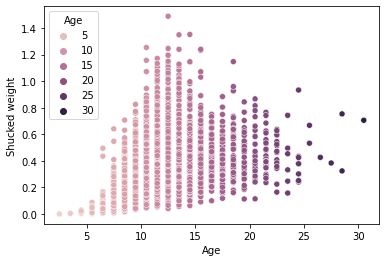

In [37]:
sns.scatterplot(data=data, x="Age", y="Shucked weight", hue="Age")

<AxesSubplot:xlabel='Age', ylabel='Viscera weight'>

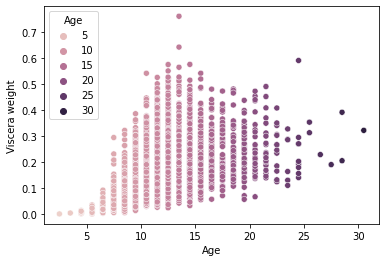

In [38]:
sns.scatterplot(data=data, x="Age", y="Viscera weight", hue="Age")

Here we can see Whole weight, Shucked weight and Viscera weight are having linear Relationship.

<AxesSubplot:xlabel='Age', ylabel='Shell weight'>

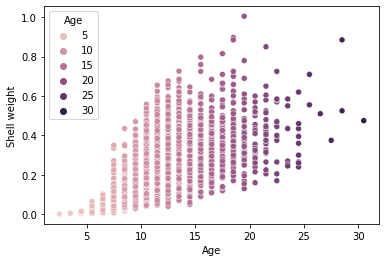

In [39]:
sns.scatterplot(data=data, x="Age", y="Shell weight", hue="Age")

### Multivariate analysis using pair plot

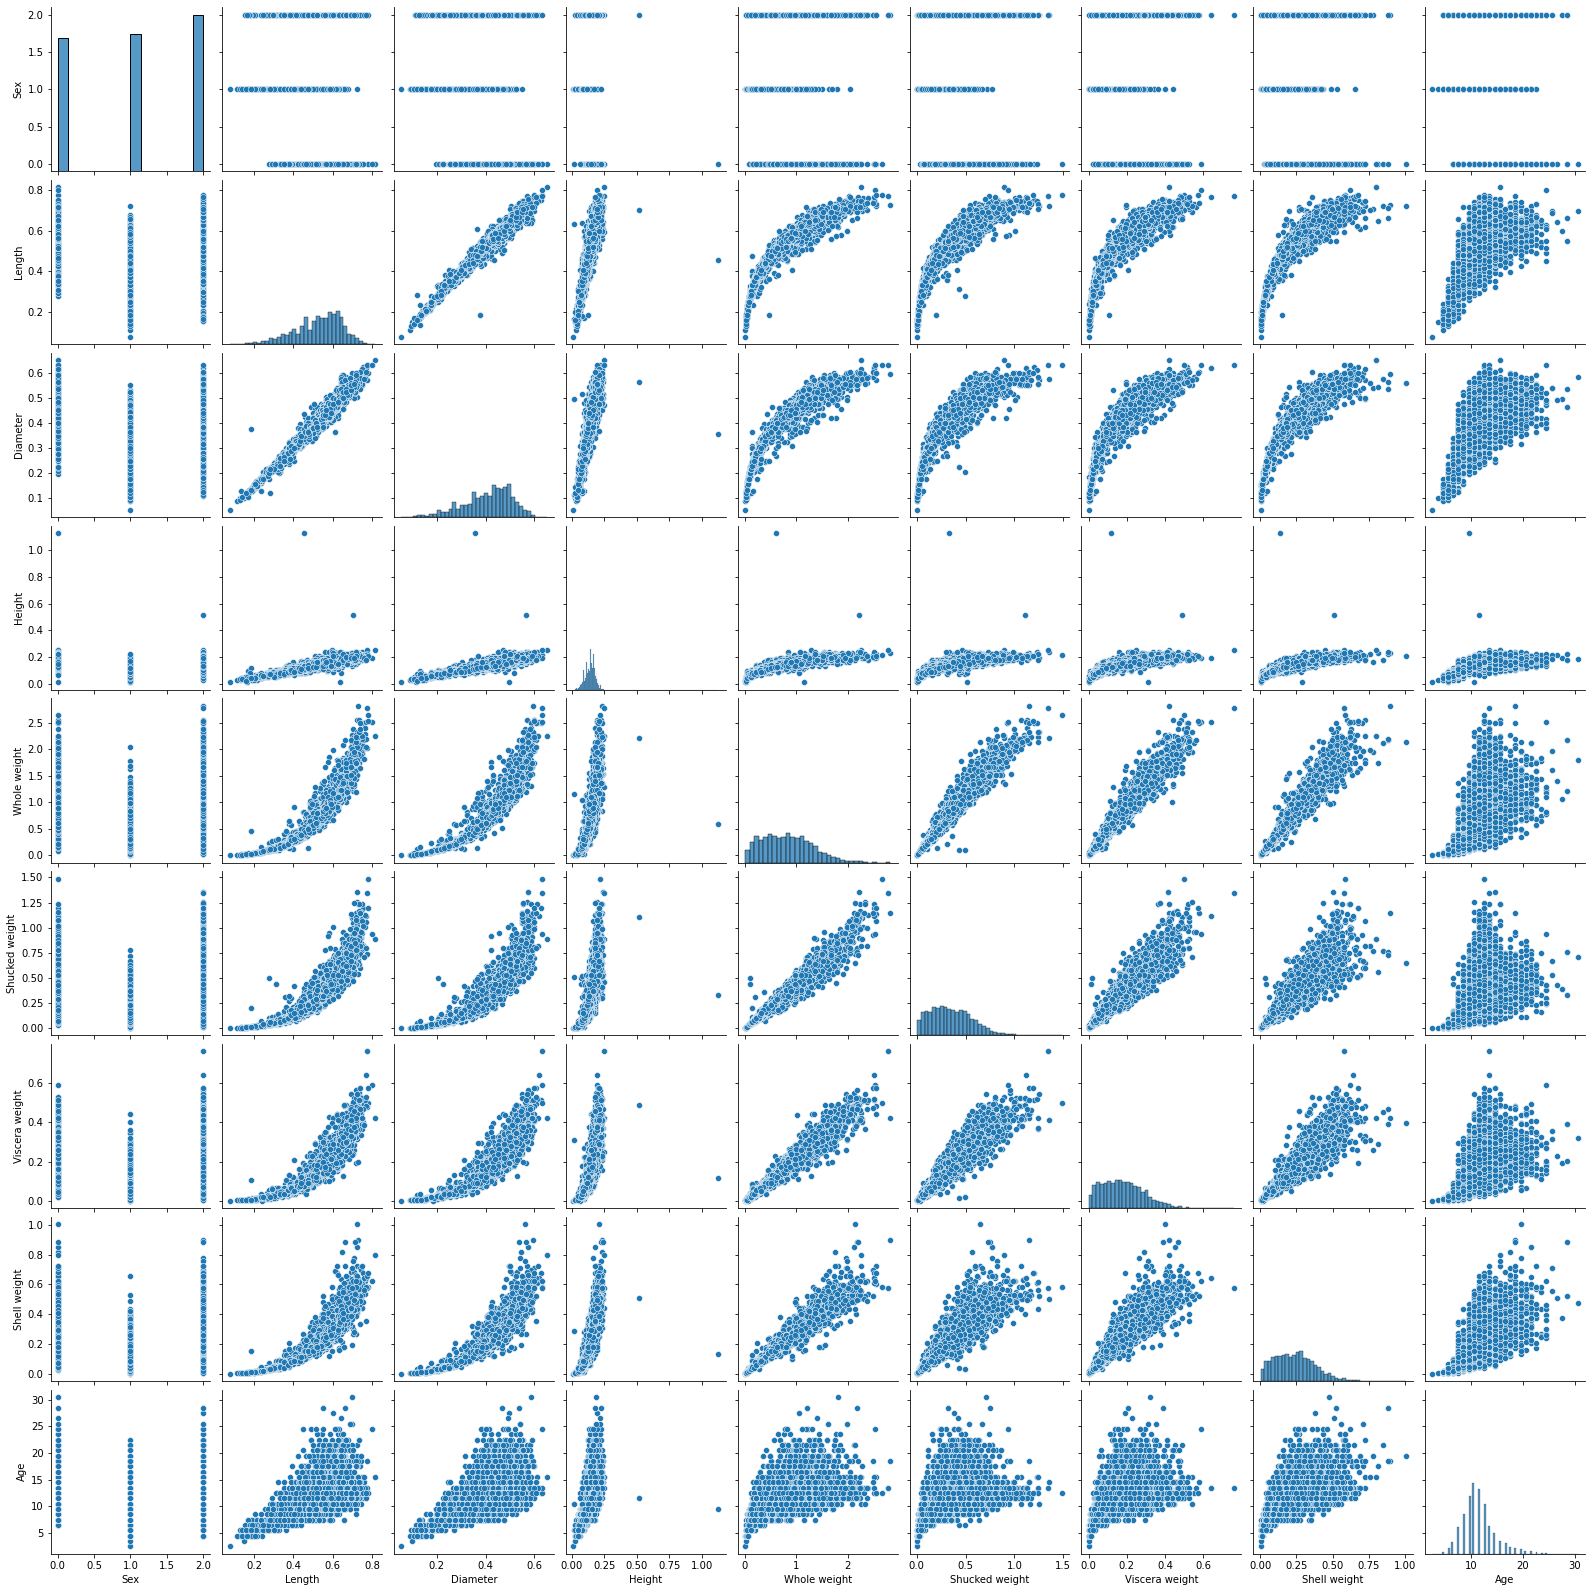

In [40]:
sns.pairplot(data)

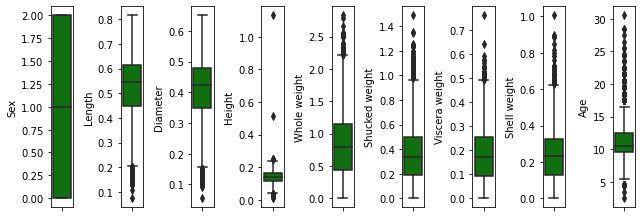

In [41]:
collist=data.columns.values
ncol= 10
nrows= 10
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=data[collist[i]],color='green', orient='x')
    plt.tight_layout()

Here we can see ouliers are present in the data.

In [42]:
# Removing Outliers

In [43]:
from scipy.stats import zscore
z= np.abs(zscore(data))
z

array([[1.15167461, 0.57527573, 0.43282928, ..., 0.72680916, 0.63819465,
        1.57107931],
       [1.15167461, 1.4498756 , 1.44081267, ..., 1.20585737, 1.21292621,
        0.91043251],
       [1.28041517, 0.04943846, 0.12156159, ..., 0.35725768, 0.20714599,
        0.29005456],
       ...,
       [1.15167461, 0.63250504, 0.67595246, ..., 0.97495258, 0.49690017,
        0.29005456],
       [1.28041517, 0.8407431 , 0.7767508 , ..., 0.73314729, 0.41069044,
        0.02013442],
       [1.15167461, 1.54875252, 1.48233918, ..., 1.78705336, 1.84033518,
        0.64051238]])

In [44]:
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1416, 1416, 1417, 1421, 1425, 1426, 1426, 1426, 1427, 1428,
       1428, 1527, 1753, 1755, 1756, 1758, 1760, 1761, 1761, 1761, 1762,
       1762, 1762, 1820, 1981, 1985, 1986, 1986, 2050, 2089, 2107, 2107,
       2113, 2113, 2156, 2160, 2175, 2179, 2198, 2200, 2207, 2208, 2273,
       2274, 2304, 2333, 2333, 2333, 2334, 2343, 2357, 2367, 2380, 2435,
       2458, 2470, 2543, 2622, 2623, 2623, 2623, 2

In [45]:
df=data[(z<3).all(axis=1)]
print(data.shape)
print(df.shape)

(4175, 9)
(4027, 9)


In [46]:
Loss_percentage=(4175-4027)/4175*100
print(Loss_percentage)

3.5449101796407185


# Removing Skweness

## First check the Skewness present in the data.

In [47]:
df.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Age               0.725464
dtype: float64

In [48]:
from sklearn.preprocessing import power_transform

In [49]:
# Divide the data into features and vectors.

x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [50]:
X=power_transform(x, method='yeo-johnson')

We have removed Skewness Present in the data.

# Scaling the data Using StandardScaler.

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
SDc=StandardScaler()
X=SDc.fit_transform(X)

In [53]:
X

array([[ 1.13432919, -0.68445079, -0.54337947, ..., -0.54086524,
        -0.68803217, -0.58635376],
       [ 1.13432919, -1.4117394 , -1.40113174, ..., -1.31131805,
        -1.33285416, -1.33271691],
       [-1.31306782, -0.0462191 ,  0.03716259, ..., -0.36270513,
        -0.24037305, -0.08021413],
       ...,
       [ 1.13432919,  0.65112915,  0.70592133, ...,  0.90189694,
         1.08965131,  0.66363183],
       [-1.31306782,  0.92606411,  0.8377131 , ...,  0.92415296,
         0.87642835,  0.57752029],
       [ 1.13432919,  1.9719402 ,  1.85550496, ...,  2.31446634,
         1.73214622,  1.85675543]])

Our data is now scaled, in next step we will check multicollinearity.

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
X= pd.DataFrame(data=X, columns=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'])

In [56]:
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.134329,-0.684451,-0.543379,-1.158933,-0.575135,-0.540865,-0.688032,-0.586354
1,1.134329,-1.411739,-1.401132,-1.280406,-1.354050,-1.311318,-1.332854,-1.332717
2,-1.313068,-0.046219,0.037163,-0.128305,-0.184498,-0.362705,-0.240373,-0.080214
3,1.134329,-0.799651,-0.543379,-0.395963,-0.570150,-0.592261,-0.539936,-0.542533
4,-0.008746,-1.530577,-1.474343,-1.518600,-1.414577,-1.378735,-1.451548,-1.482926
...,...,...,...,...,...,...,...,...
4022,-1.313068,0.289495,0.390420,0.716250,0.277874,0.217107,0.690782,0.227258
4023,1.134329,0.545081,0.269661,-0.128305,0.441584,0.534924,0.474179,0.314936
4024,1.134329,0.651129,0.705921,1.943633,0.853434,0.901897,1.089651,0.663632
4025,-1.313068,0.926064,0.837713,0.286070,0.697385,0.924153,0.876428,0.577520


In [57]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [58]:
calc_vif(X)

,variables,VIF FACTOR
0,Sex,1.013199
1,Length,34.538446
2,Diameter,33.515527
3,Height,6.524799
4,Whole weight,136.046977
5,Shucked weight,36.257857
6,Viscera weight,21.937509
7,Shell weight,30.127367


Data is having multicolinearity, whole weight, shuked weight, length are having high value of VIF.

We can remove the columns having high VIF one by one, or we can perform PCA.

here we are performing PCA.

In [59]:
from sklearn.decomposition import PCA

In [60]:
pca=PCA(n_components=6)

In [61]:
Xpca=pca.fit_transform(X)

In [62]:
X=Xpca

In [63]:
X=pd.DataFrame(data=X)

In [64]:
X

,0,1,2,3,4,5
0,-1.828289,-1.089578,0.488480,-0.146643,-0.105128,0.142613
1,-3.594174,-1.031819,-0.031322,0.037773,-0.039996,0.032991
2,-0.341209,1.329608,-0.034482,-0.272845,0.044279,-0.092322
3,-1.541008,-1.088025,-0.202954,0.056779,-0.063730,0.028585
4,-3.871177,0.116655,0.132025,0.057970,-0.027926,0.073507
...,...,...,...,...,...,...
4022,1.092812,1.290319,-0.311185,0.220339,-0.095307,-0.320433
4023,0.902247,-1.169713,0.506581,0.038482,-0.105452,0.013215
4024,2.520725,-1.197327,-0.990194,0.558350,0.153690,-0.222628
4025,1.981623,1.248801,0.542265,0.060928,0.037579,-0.108303


# Model Design

In [65]:
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [66]:
lr=LinearRegression()
for i in range(0, 100):
    x_train, x_test, y_train, y_test= train_test_split(X,y,random_state= i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    print(f"At Random Stat {i}, the training accuracy is:{r2_score(y_train,pred_train)}")
    print(f"At Random Stat {i}, the testing accuracy is:{r2_score(y_test,pred_test)}")
    print("\n")

At Random Stat 0, the training accuracy is:0.5039131260231231
At Random Stat 0, the testing accuracy is:0.4670736068575454


At Random Stat 1, the training accuracy is:0.5011772892102633
At Random Stat 1, the testing accuracy is:0.4760761734304987


At Random Stat 2, the training accuracy is:0.49722113781727406
At Random Stat 2, the testing accuracy is:0.49518692867988956


At Random Stat 3, the training accuracy is:0.49941537973364036
At Random Stat 3, the testing accuracy is:0.4858759059158174


At Random Stat 4, the training accuracy is:0.4957284047550258
At Random Stat 4, the testing accuracy is:0.5006208553064146


At Random Stat 5, the training accuracy is:0.5037527532533455
At Random Stat 5, the testing accuracy is:0.46835108224223143


At Random Stat 6, the training accuracy is:0.49328233043897685
At Random Stat 6, the testing accuracy is:0.509628312267766


At Random Stat 7, the training accuracy is:0.5082703025318864
At Random Stat 7, the testing accuracy is:0.450962688024022

At Randon state 98 we are getting better results.

In [67]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(X,y, test_size=0.20, random_state= 98)

In [68]:
lr.fit(x_train_b,y_train_b)
pred_test=lr.predict(x_test_b)

print(r2_score(y_test_b,pred_test))

0.4972847459369213


In next step we will perform cross validation of the model.

# Cross Validation of Model

In [69]:
Train_accuracy= r2_score(y_train_b, pred_train)
Test_accuracy= r2_score(y_test_b, pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(lr,X,y, cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for testting {Test_accuracy}")

At cross fold 2 the cv score is 0.49441926747130605 and accuracy score for testting 0.4972847459369213
At cross fold 3 the cv score is 0.4798464288659585 and accuracy score for testting 0.4972847459369213
At cross fold 4 the cv score is 0.4091009566780043 and accuracy score for testting 0.4972847459369213
At cross fold 5 the cv score is 0.4076212555733833 and accuracy score for testting 0.4972847459369213
At cross fold 6 the cv score is 0.41282830139162696 and accuracy score for testting 0.4972847459369213
At cross fold 7 the cv score is 0.42168783602577176 and accuracy score for testting 0.4972847459369213
At cross fold 8 the cv score is 0.3837286096584507 and accuracy score for testting 0.4972847459369213
At cross fold 9 the cv score is 0.4117790689088897 and accuracy score for testting 0.4972847459369213


In [70]:
CV_selected=cross_val_score(lr,X,y,cv=2).mean()
print("The cv score is: ", CV_selected,"\nThe accuracy score is: ", Test_accuracy)

The cv score is:  0.49441926747130605 
The accuracy score is:  0.4972847459369213


# Regularization

## 1. Lasso

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10], 'random_state': list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls, parameters)
clf.fit(x_train_b, y_train_b)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [72]:
ls=Lasso(alpha=0.001, random_state=0)
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,X,y,cv=2)
lsc=rdscore.mean()
print('Cross val Score :', lsc*100)

R2 score: 49.7365559439664
Cross val Score : 49.44141342721931


In [73]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))

Error:
Mean Absolute Error: 1.5469623015652192
Mean Squared Error: 4.464514422033723
Root Mean Square Error: 2.112939758259502


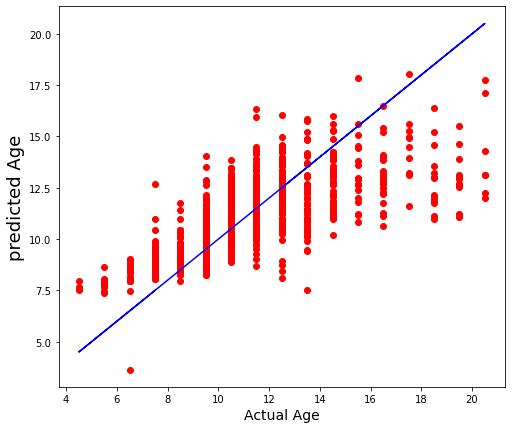

In [74]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= ls_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Age', fontsize= 14 )
plt.ylabel('predicted Age', fontsize= 18)
plt.show()

## 2. Ridge

In [75]:
from sklearn.linear_model import Ridge

In [76]:
parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10], 'fit_intercept': [True,False], 'normalize':[True, False], 'copy_X': [True , False], 'tol':[0.0001,0.001,0.01,0.1,1,10]}
rd=Ridge()
rdclf=GridSearchCV(rd, parameters)
rdclf.fit(x_train_b, y_train_b)
print(rdclf.best_params_)

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'tol': 0.0001}


In [77]:
rd= Ridge(alpha= 0.01, copy_X= True, fit_intercept= True, normalize= True, random_state=0 , tol= 0.0001)
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,X,y,cv=2)
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  49.64499587563183
Cross val Score 49.4353041557581


In [78]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))

Error:
Mean Absolute Error: 1.5485173527892102
Mean Squared Error: 4.472646997372301
Root Mean Square Error: 2.1148633519384417


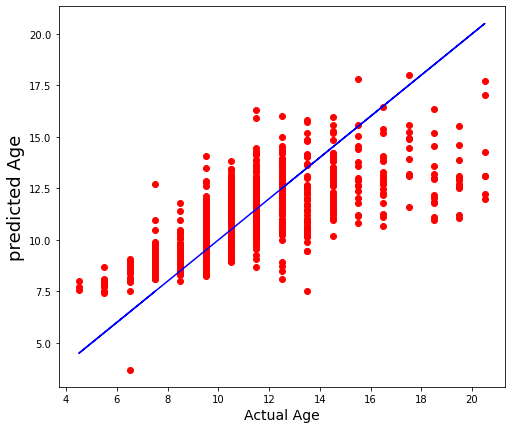

In [79]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rd_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Age', fontsize= 14 )
plt.ylabel('predicted Age', fontsize= 18)
plt.show()

## 3. DecisionTreeRegressor

In [80]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
parameters={'criterion':['mse','friedman_mse', 'mae', 'poisson'], 'splitter':['best', 'random']}
dt=DecisionTreeRegressor()
dtclf= GridSearchCV(dt, parameters )
dtclf.fit(x_train_b, y_train_b)
print(dtclf.best_params_)


{'criterion': 'friedman_mse', 'splitter': 'best'}


In [82]:
dt=DecisionTreeRegressor(criterion='friedman_mse', splitter='best' )
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score=r2_score(y_test_b, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,X,y,cv=2)
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

R2 Score: 10.016332144238627
Cross Val Score: 6.395019507209831


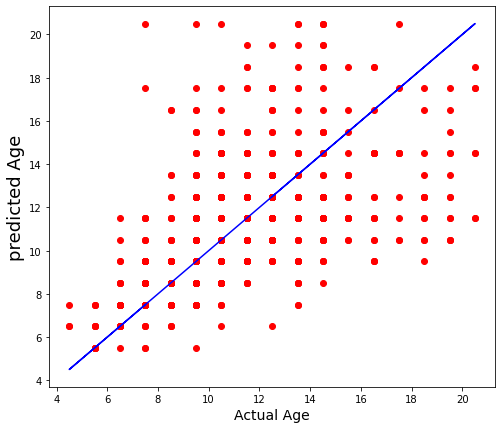

In [83]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= dt_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Age', fontsize= 14 )
plt.ylabel('predicted Age', fontsize= 18)
plt.show()

## 4. KNeighborsRegressor

In [84]:
from sklearn.neighbors import KNeighborsRegressor

In [85]:
parameters={'n_neighbors':[1,2,3,5,6,7,8,9,10],'weights':['uniform', 'distance'], 'algorithm':['auto','ball_tree','kd_tree','brute']}
kn=KNeighborsRegressor()
knclf=GridSearchCV(kn,parameters)
knclf.fit(x_train_b, y_train_b)
print(knclf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}


In [86]:
kn=KNeighborsRegressor(algorithm='auto', n_neighbors=10, weights='distance')
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 Score: 0', kn_score*100)

kncvscore=cross_val_score(kn,X,y, cv=2)
print('Cross val Score :',kncvscore*100 )

R2 Score: 0 51.49572706127616
Cross val Score : [47.66873013 48.98578715]


In [87]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))

Error:
Mean Absolute Error: 1.494812586166672
Mean Squared Error: 4.308260807273478
Root Mean Square Error: 2.075635037108759


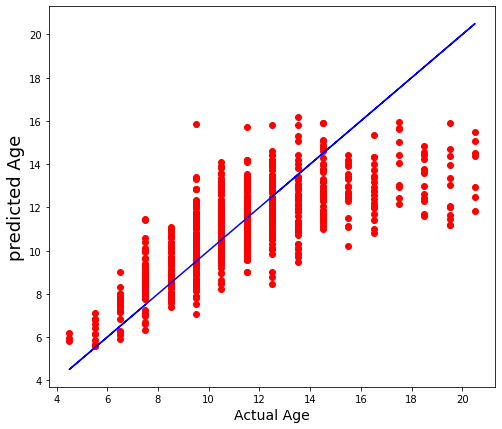

In [88]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= kn_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Age', fontsize= 14 )
plt.ylabel('predicted Age', fontsize= 18)
plt.show()

## Ensemble Techniques

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
parameters={'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
rf=RandomForestRegressor()
rfclf=GridSearchCV(rf, parameters)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [91]:
rf=RandomForestRegressor(criterion='mae', max_features='log2')
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,X,y, cv=2)
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 54.455214896634715
Cross val Score : 52.07775870815573


In [92]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Error:
Mean Absolute Error: 1.4587841191067
Mean Squared Error: 4.045392307692308
Root Mean Square Error: 2.0113160635992315


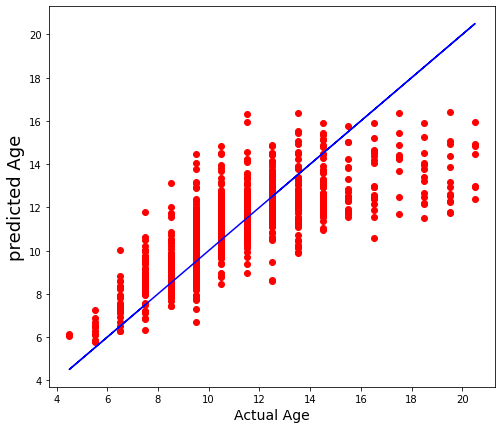

In [93]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rf_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Age', fontsize= 14 )
plt.ylabel('predicted Age', fontsize= 18)
plt.show()

In [94]:
from sklearn.ensemble import AdaBoostRegressor

In [95]:
ad=AdaBoostRegressor()
ad.fit(x_train_b,y_train_b)
ad.score(x_train,y_train_b)

ad_pred=ad.predict(x_test_b)

ad_score= r2_score(y_test_b, ad_pred)
print('R2 score:', ad_score*100)

adcv=cross_val_score(ad ,X,y, cv=2)
adcvscore=adcv.mean()
print('Cross val Score :',adcvscore*100 )

R2 score: 43.156434631535824
Cross val Score : 35.15986608581771


## GradientBoostingRegressor

In [96]:
from sklearn.ensemble import GradientBoostingRegressor

In [97]:
parameters={'loss':['ls', 'lad', 'huber', 'quantile'],'criterion':['friedman_mse', 'mse', 'mae']}
gb=GradientBoostingRegressor()
gbclf=GridSearchCV(gb, parameters)
gbclf.fit(x_train_b, y_train_b)
print(gbclf.best_params_)

{'criterion': 'mse', 'loss': 'huber'}


In [98]:
gb=GradientBoostingRegressor(criterion='mse', loss='huber')
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, rf_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,X,y, cv=2)
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 54.455214896634715
Cross val Score : 52.03261901326426


In [99]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,gb_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,gb_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,gb_pred)))

Error:
Mean Absolute Error: 1.4587841191067
Mean Squared Error: 4.045392307692308
Root Mean Square Error: 2.0113160635992315


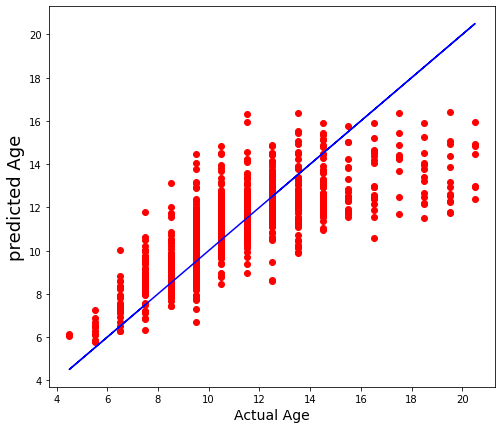

In [100]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= gb_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Age', fontsize= 14 )
plt.ylabel('predicted Age', fontsize= 18)
plt.show()

In [101]:
RB=GradientBoostingRegressor()
RB.fit(X,y)

GradientBoostingRegressor()

In [102]:
import pickle
filename='Abalone_Case_Study.pkl'
pickle.dump(RB,open(filename,'wb'))